# Reinforcement Learning Week 1 Coding: Multi Arm Bandits
#### Authored by: Mithun Vanniasinghe

In [105]:
import numpy as np # python library for dealing with arrays
import matplotlib.pyplot as plt # python library for plotting

This class is representing our bandit with multiple arms. It sets a random seed and defines the probability distributions each arm draws its reward from. In our experiment, the reward of each arm follows a normal distriubtion with varing means and standard deviation zero.

**Recall**:
We want to estimate the mean by updating our q-values/action values so we pick from the distriubtion with the greatest mean (and therefore greatest reward). But we also must balance with exploration. If we never try an arm a few times, we can never learn how good it is!

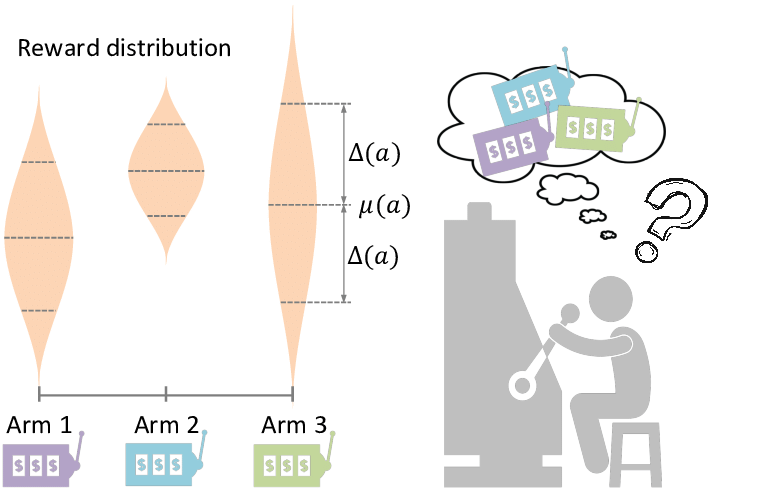

In [106]:
class MultiArmBandit:
  def __init__(self, k, seed=42):
    self.k = k
    self.true_values = np.random.randn(k) # draw k values from standard normal dist
    np.random.seed(seed) # set random seed for reproducibilty

  def pull_arm(self, arm):
    '''
    Gives random reward according to a distriubtion hidden from agent and returns a reward
    '''
    if arm < 0 or arm >= self.k:
      raise ValueError("Invalid arm. Pull an arm in [0, k-1]")
    reward = np.random.normal(loc=self.true_values[arm], scale=1) # normal with mean true_value[arm], std deviation 1
    return reward

In [107]:
class Agent:
  def __init__(self, epsilon, bandit_class):
    self.bandit_class = bandit_class
    self.epsilon = epsilon
    self.k = self.bandit_class.k
    self.estimated_values = np.zeros((self.k)) # an array to hold the estimated values for each arm
    self.counts = np.zeros((self.k)) # an array to hold the number of times each
    self.rewards = [] # not required from the algorithm but we want to keep track of this to plot later


  def select_action(self):
    '''
    this method is used to select an action with the epsilon greedy strategy
    return the selected action
    '''
    # hint: use np.random.rand()
    # hint: use np.random.choice()
    # hint: use np.argmax
    if np.random.rand() < self.epsilon: # with probability epsilon explore
      action = np.random.choice(self.k) # choose an action (arm) randomly
    else:
      action = np.argmax(self.estimated_values)
    return action

  def update_values(self, action, reward):
    '''
    update the estimated means of the distrubtions (aka action values) of the arm/action you just tried
    also keeps track of the reward (for plotting purposes, Note: the whole point of the iteratvive update is to not need to keep track of all reward)
    '''
    # hint use the iterative update equation for sample averages
    self.counts[action] += 1
    self.estimated_values[action] += 1/(self.counts[action]) * (reward - self.estimated_values[action])
    self.rewards.append(reward)

  def reset(self):
    '''
    resets all estimates to that we can do the experiment again
    '''
    self.estimated_values = np.zeros((self.k))
    self.counts = np.zeros((self.k))





## Experiment Time!

Try out 3 different agents with different epsilon values, below is an example of some epsilon values but feel free to change the epsilon initialization and try other epsilons when you intialize the agent!

In [113]:
# run experiement
num_steps = 1000 # how many arms we draw total in an experiment
num_experiments = 100 # how many time we repeat the <num steps> experiment (for more accuarate analysis)
k = 10 # number of arms


bandit = MultiArmBandit(k=10)
agent1 = Agent(epsilon=0.1, bandit_class=bandit)
agent2 = Agent(epsilon=0.5, bandit_class=bandit)
agent3 = Agent(epsilon=0, bandit_class=bandit)


# arrays to keep track of on average how much reward each agent gets by each time step
# this will be averaged over all experiments so the result is less random and so we can have more meaningful analysis
average_rewards_agent1 = np.zeros(num_steps)
average_rewards_agent2 = np.zeros(num_steps)
average_rewards_agent3 = np.zeros(num_steps)

# a 2D array to keep track of the estimates for each agent
# look smthg like this
# [ [estimated_val_arm1, .... , estimated_val_armk],
#   [estimated_val_arm1, .... , estimated_val_armk],
#   [estimated_val_arm1, .... , estimated_val_armk],
#   ....
#   [estimated_val_arm1, .... , estimated_val_armk],
#   ]
average_est_vals_agent1 = np.zeros((num_experiments,k))
average_est_vals_agent2 = np.zeros((num_experiments,k))
average_est_vals_agent3 = np.zeros((num_experiments,k))

for experiment in range(num_experiments):
  for step in range(num_steps):
    # each agent selects an action, gets a reward from the bandit, and updates is action value estimates based on the reward it got
    action = agent1.select_action()
    reward = bandit.pull_arm(action)
    agent1.update_values(action,reward)

    action = agent2.select_action()
    reward = bandit.pull_arm(action)
    agent2.update_values(action,reward)

    action = agent3.select_action()
    reward = bandit.pull_arm(action)
    agent3.update_values(action,reward)

    average_rewards_agent1[step] += agent1.rewards[-1]
    average_rewards_agent2[step] += agent2.rewards[-1]
    average_rewards_agent3[step] += agent3.rewards[-1]


  # keep track of estiamted values for each experiment for plotting later
  average_est_vals_agent1[experiment] = agent1.estimated_values
  average_est_vals_agent2[experiment] = agent2.estimated_values
  average_est_vals_agent3[experiment] = agent3.estimated_values

  # reset after each experiement to not use old estimated values in a new experiemet
  agent1.reset()
  agent2.reset()
  agent3.reset()

# Calculate the average rewards for each agent for each time step
average_rewards_agent1 /= num_experiments
average_rewards_agent2 /= num_experiments
average_rewards_agent3 /= num_experiments

# find average estimated values for each arm, averaging over all experiment
average_est_vals_agent1 = np.sum(average_est_vals_agent1, axis = 0)/num_experiments
average_est_vals_agent2 = np.sum(average_est_vals_agent2, axis = 0)/num_experiments
average_est_vals_agent3 = np.sum(average_est_vals_agent3, axis = 0)/num_experiments



Awesome! We just ran an experiement with 3 different agents. Let's see how we did for one of them. The following function is already written for you. Essentially, it plots the reward distriubtion for each arm in our bandit. We can see how close our sample averages (aka estimated action values) are to the true means of the distriubtion (aka the true action values). Feel free to plot for other agents as well to see how well we did in estimating.


In [109]:
def plot_action_values(true_action_values, k, estimated_values):
  x = np.linspace(-5, 5, 1000)
  fig, axs = plt.subplots(k, figsize=(8, 3 * k))  # k subplots in a single column
  for i in range(k):
     gaussian = (1 / (1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - true_action_values[i]) / 1) ** 2)
     axs[i].plot(x, gaussian, label=f'True Action Value: {true_action_values[i]:.2f} For Arm {i}', color='blue')
     axs[i].axvline(x=estimated_values[i], color='red', linestyle='--', label='Estimated Action Value')
     axs[i].set_title(f'Distribution for Action {i + 1}')
     axs[i].set_xlabel('Value')
     axs[i].set_ylabel('Probability Density')
     axs[i].legend()
     axs[i].grid()

  plt.tight_layout()
  plt.show()



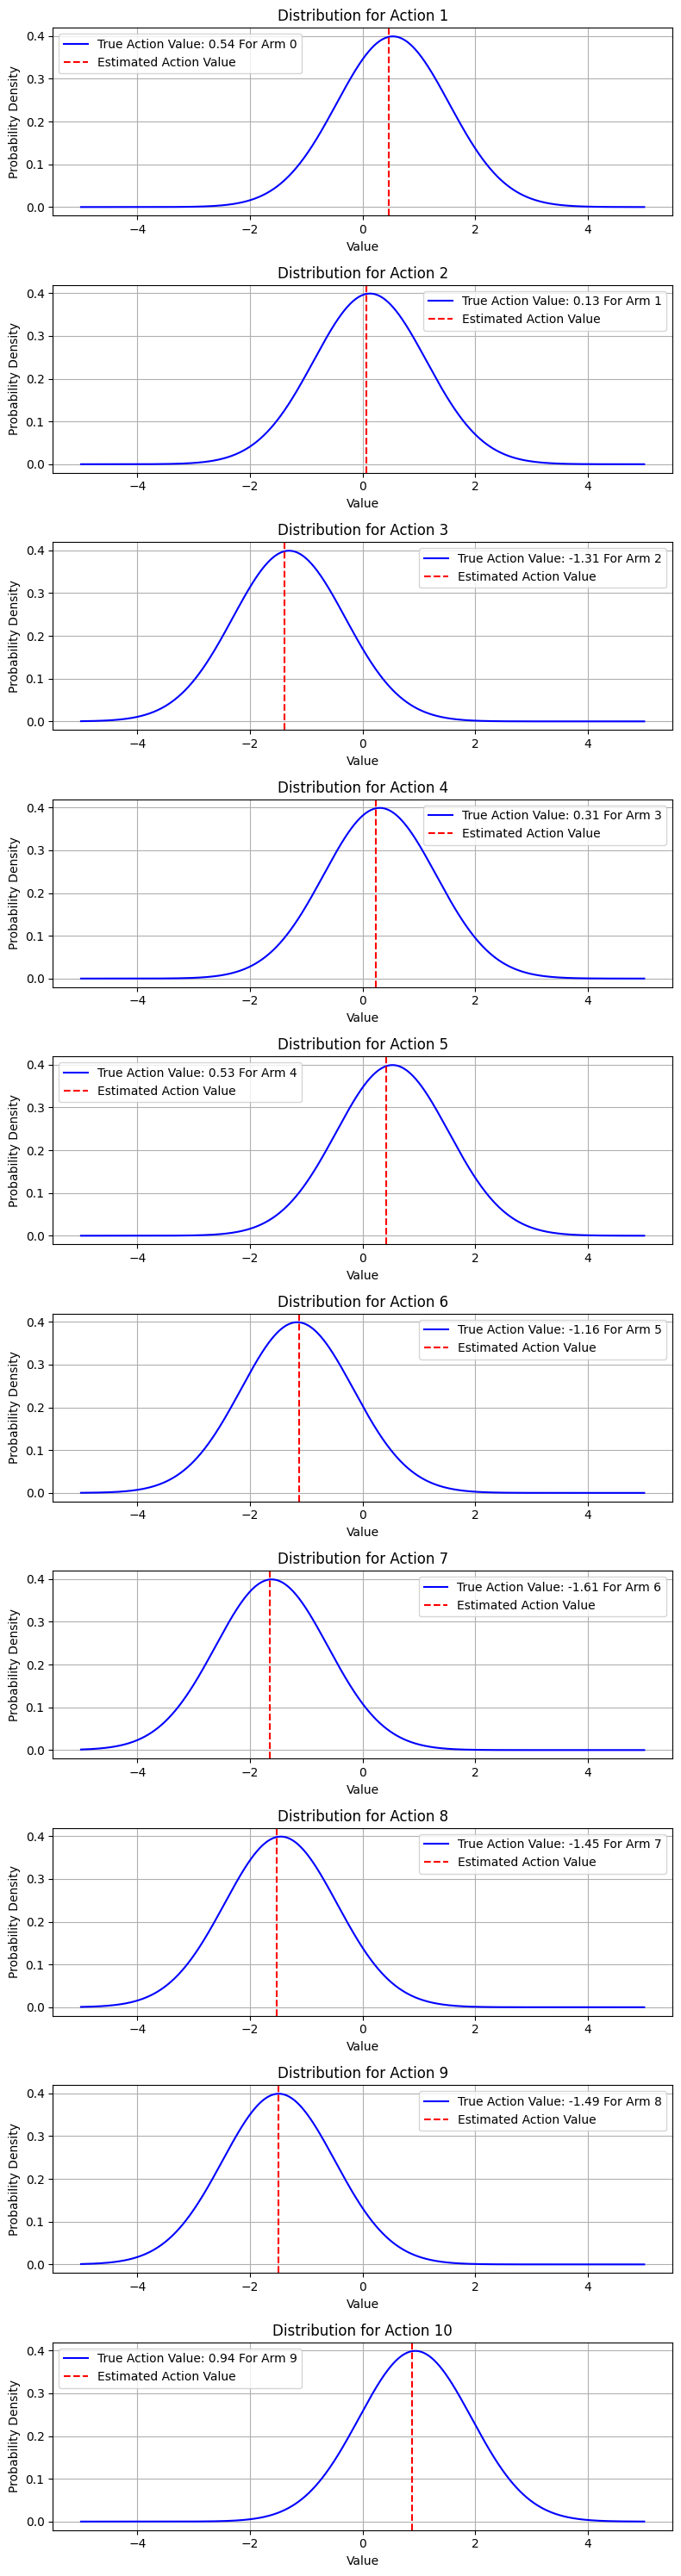

In [110]:
plot_action_values(bandit.true_values, 10, average_est_vals_agent1) # plotting for ageent 1

## Finding the Best Exploration Probability, Epsilon

To compare different values of epsilon, recall each agent was intialized to a different value of epsilon. We can look

In [111]:
def plot_reward(reward_lists, epsilon_list):
  """
  Plots the cumulative rewards obtained by different agents over multiple steps
  for various exploration probabilities (epsilon values).

  This function creates a scatter plot where each series represents the cumulative
  rewards for a specific epsilon value. The x-axis corresponds to the number of
  steps taken, while the y-axis represents the cumulative rewards obtained by
  the agent over those steps.

  Parameters:
  -----------
  reward_lists : list of list of float
      A list containing lists of cumulative rewards for each agent. Each inner
      list should correspond to the rewards obtained over time steps for a
      specific agent.

  epsilon_list : list of float
      A list containing the epsilon values (exploration probabilities) that
      correspond to the reward lists. The length of this list should match
      the number of reward lists provided.

  Returns:
  --------
  None
      This function displays the plot directly and does not return any value.
  """
  plt.figure(figsize=(10, 6))
  for rewards, epsilon in zip(reward_lists, epsilon_list):
    plt.scatter(range(len(rewards)), rewards, label=f"Epsilon: {epsilon}")

  plt.title("Rewards vs Num Steps for Various Exploration Probabilities (Epsilon)")
  plt.xlabel('Steps')
  plt.ylabel('Cumulative Reward')
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

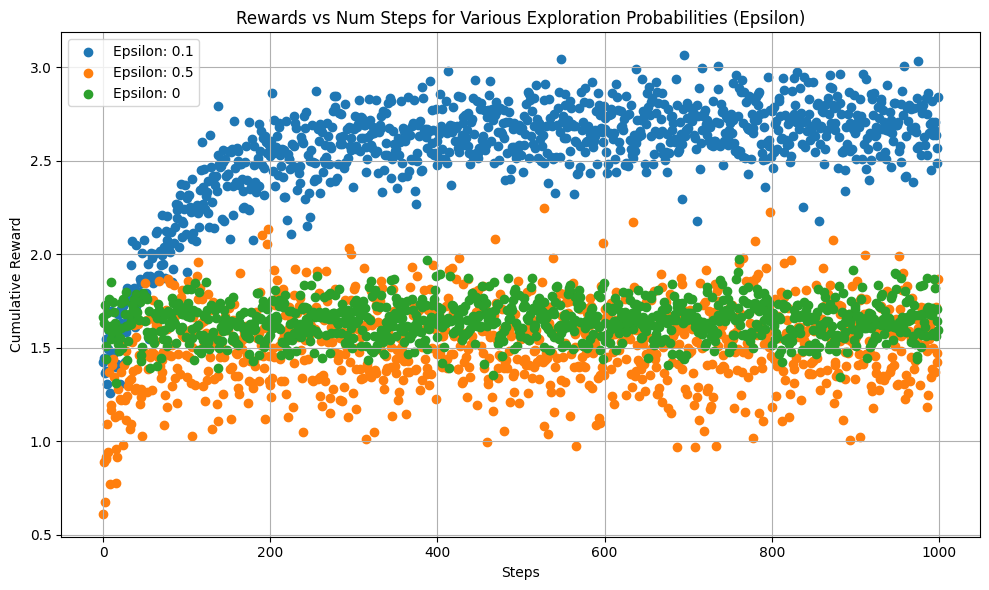

In [114]:
# example usage
reward_lists = [average_rewards_agent1, average_rewards_agent2, average_rewards_agent3]
epsilon_list = [agent1.epsilon, agent2.epsilon, agent3.epsilon]
plot_reward(reward_lists, epsilon_list)

## Choosing Epsilon

See which value of epsilon does better! Feel free to retry different agents with different values of epsilon and see which does best.